In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [2]:
#Price Generation

#Input parametres for price genration
Num_of_hours = 24
High_price_start = 17
High_price_end= 20
TOU_model_high_price = 1
TOU_model_low_price = 0.5

#price generation
TOU_model = []
RTP_model_int=[]
for i in range(Num_of_hours):
    if i >= High_price_start and i <= High_price_end:
        TOU_model.append(TOU_model_high_price)
    else:
         TOU_model.append(TOU_model_low_price)
for i in range(Num_of_hours):
    if i >= High_price_start and i <= High_price_end:
        RTP_model_int.append (np.random.gamma(1, 1.0)/10)
    else:
        RTP_model_int.append (np.random.gamma(0.1,1.0)/10)
RTP_model = [x + 0.5 for x in RTP_model_int]

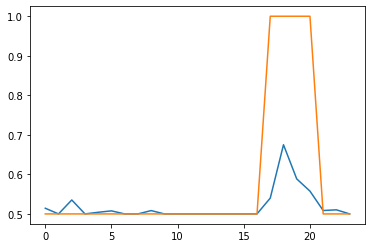

In [3]:
#price model view
RTP_Price_model= RTP_model ## ALWAYS CHECK IF THE CURVE MAKE SENSE, OTHERWISE RUN THE ABOVE CELL A COUPLE OF TIMES
TOU_Price_model= TOU_model
plt.plot(RTP_model)
plt.plot(TOU_model)

In [4]:
RTP_Model_Saved=[0.3000478860262099,
 0.3000000000040512,
 0.3923340304833669,
 0.3117362039038414,
 0.3000000137102587,
 0.300000351920672,
 0.30559668457032657,
 0.3000000029648421,
 0.30000000002333566,
 0.30000000000003574,
 0.30000403663726155,
 0.3000000112344712,
 0.30310735177557924,
 0.3000030697482204,
 0.30000006304466326,
 0.3000050021449176,
 0.3,
 0.48147871571570877,
 0.43902586065153737,
 0.8759518995206619,
 0.4381357359784148,
 0.3010501786015481,
 0.30333455079120714,
 0.30000112872618123]

# Problem # 1

Single House with 3 Appliances 

In [5]:
#Input parameters
Num_of_hours = 24
Num_of_appliances = 3

In [6]:
## construct the coff matrix for EV (part 1- equality Matrix): eq_lhs
EV=np.hstack([np.identity(Num_of_hours), np.zeros((Num_of_hours,Num_of_hours)),np.zeros((Num_of_hours,Num_of_hours))])
WM=np.hstack([np.zeros((Num_of_hours,Num_of_hours)), np.identity(Num_of_hours), np.zeros((Num_of_hours,Num_of_hours))])
Dish=np.hstack([np.zeros((Num_of_hours,Num_of_hours)),np.zeros((Num_of_hours,Num_of_hours)), np.identity(Num_of_hours)])

applinces= np.vstack([EV,WM,Dish])

zeros_list= [0] * Num_of_hours
schedule_EV =[]
schedule_WM =[]
schedule_Dish=[]

for i in range (1,Num_of_hours+1):
    schedule_EV.append(1) if i < 8 or i > 20 else schedule_EV.append(0)
    schedule_WM.append(0) if i > 20 or i < 8 else schedule_WM.append(1)
    schedule_Dish.append(0)if i >20 or i < 8 else schedule_Dish.append(1)

schedule_EV=schedule_EV+zeros_list +zeros_list
schedule_WM = zeros_list+ schedule_WM +zeros_list
schedule_Dish =zeros_list+ zeros_list+ schedule_Dish
schedule_conidtions=np.vstack([schedule_EV,schedule_WM,schedule_Dish])
schedule_applinces= np.vstack([schedule_conidtions,applinces])

In [7]:
## construct the coff matrix (part 1- equality Matrix): eq_rhs

Daily_consumption_EV= 9.9
Daily_consumption_WM= 1.94
Daily_consumption_Dish= 1.4
Maximum_consumption_EV_per_hour = 3
Maximum_consumption_WM_per_hour = 2.4
Maximum_consumption_Dish_per_hour = 0.7

consumption=[]
for i in range ((Num_of_hours*Num_of_appliances)+ Num_of_appliances +2 ):
    if i==1:
        consumption.append (Daily_consumption_EV)
    elif i==2:
        consumption.append(Daily_consumption_WM)
    elif i==3:
        consumption.append(Daily_consumption_Dish)
    elif i> 3 and i < (Num_of_hours+Num_of_appliances+1):
        consumption.append(Maximum_consumption_EV_per_hour)
    elif i >= (Num_of_hours+Num_of_appliances+1) and i < (Num_of_hours+Num_of_appliances+1+Num_of_hours):
        consumption.append(Maximum_consumption_WM_per_hour)
    elif i> (Num_of_hours+Num_of_appliances+1+Num_of_hours):
        consumption.append(Maximum_consumption_WM_per_hour)
            
max_cosumption=np.c_[consumption]

In [8]:
## construct price matrix  (part 3- ): c
Model_in_use= TOU_model ### DONT FORGET TO CHANGE IF NEEDED

Model_in_use_1=Model_in_use
for i in range (Num_of_appliances-1):
    Model_in_use_1=  Model_in_use_1+Model_in_use
price_1 =Model_in_use_1

In [9]:
#linear programing parameters
obj=price_1
lhs_ineq =schedule_applinces [3:,:]
rhs_ineq = max_cosumption [3:]
lhs_eq = schedule_applinces [:3,:]
rhs_eq = max_cosumption[:3]

In [12]:
Optimization_1=linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, method="revised simplex")

In [13]:
print ('Optimized consumption for the EV each hour:', np.round(Optimization_1.x [:25],2),
      '\nOptimized consumption for the Washing Machine, each hour', np.round(Optimization_1.x [25:49],2),
       '\nOptimized consumption for the DishWasher, each hour', np.round(Optimization_1.x [49:],2),
      '\nTotal Optamized cost for the household in NOK', np.round(Optimization_1.fun, 2))

Optimized consumption for the EV each hour: [3.  3.  3.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ] 
Optimized consumption for the Washing Machine, each hour [0.   0.   0.   0.   0.   0.   1.94 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ] 
Optimized consumption for the DishWasher, each hour [0.  0.  0.  0.  0.  0.  1.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ] 
Total Optamized cost for the household in NOK 6.62


# Problem # 3

Nebougherhood of multiple houses

### PART 1 -EVs

In [14]:
#Input parameters for nebougherhood confugration and price model to be used
Num_of_houses =30

In [15]:
# Random selection of house if they have EV or Not
House_with_EV = []
for i in range(0,Num_of_houses):
    n = random.randint(0,1)
    House_with_EV.append(n)

#print(House_with_EV)

In [16]:
## Schedule when a household <have> EV
EV_can_start=20
EV_must_stop=8
EV_3_i =[]
for i in range (1,Num_of_hours+1):
    EV_3_i.append(1) if i < EV_must_stop or i > EV_can_start else EV_3_i.append(0)

EV_3 =np.r_[EV_3_i]
#print(EV_3)

## Schedule when a household <deosn't> have EV
No_EV_3 =np.r_[[0]*Num_of_hours]
#print(No_EV_3)


In [17]:
## construct the coff matrix for EV (part 1- equality Matrix): eq_lhs
zeros_matrix=  np.r_[[0] * Num_of_hours]
EV_schedule = np.r_[[100]*Num_of_hours]
for i in range (0,Num_of_houses):
    if House_with_EV[i]==1:
        for j in range (0,i):
            EV_schedule = np.append(EV_schedule,zeros_matrix, axis=0)
        EV_schedule = np.append(EV_schedule,EV_3, axis=0)
        for l in range (1,Num_of_houses-i):
            EV_schedule = np.append(EV_schedule,zeros_matrix, axis=0)
    
    else:
        for k in range (0,i):
            EV_schedule = np.append(EV_schedule,zeros_matrix, axis=0)
        EV_schedule= np.append(EV_schedule,No_EV_3, axis=0)
        for m in range (1,Num_of_houses-i):
            EV_schedule = np.append(EV_schedule,zeros_matrix, axis=0)
EV_schedule_per_day= np.reshape(EV_schedule[Num_of_hours:],(Num_of_houses,Num_of_houses*Num_of_hours))

#print(EV_schedule[768:810])
#print(House_with_EV[0])
#print(EV_schedule_per_day[3])

In [18]:
## construct the coff matrix for EV (part 1- equality Matrix): eq_rhs
daily_usage = 9.9
combined_daily_usage=np.r_[[100]*Num_of_houses]
for i in range (0,Num_of_houses):
    if House_with_EV[i]==1:
        combined_daily_usage=np.append(combined_daily_usage,daily_usage)
    else:
        combined_daily_usage=np.append(combined_daily_usage,0)

combined_daily_usage_int= combined_daily_usage[Num_of_houses:]
Total_daily_usage=np.reshape(combined_daily_usage_int, (Num_of_houses,1))

#print(Total_daily_usage.shape)

In [19]:
## construct the coff matrix for EV (part 2- inequality Matrix): ineq_lhs
max_power_coff=np.eye(Num_of_houses*Num_of_hours, Num_of_houses*Num_of_hours)
#print(max_power_coff)

In [20]:
## construct the coff matrix for EV (part 2- inequality Matrix): ineq_rhs
max_changring_capaicity = 3
max_changring_capaicity_list=np.multiply(np.ones(Num_of_houses*Num_of_hours),max_changring_capaicity)
max_changring_capaicity_matrix=np.c_[max_changring_capaicity_list]
#print (max_changring_capaicity_matrix)

In [21]:
## construct price matrix  (part 3- ): c
Model_in_use= RTP_model ### DONT FORGET TO CHANGE IF NEEDED
Model_in_use_3=Model_in_use
for i in range (Num_of_houses-1):
    Model_in_use_3=  Model_in_use_3+Model_in_use
price_3 =Model_in_use_3

In [22]:
#;linear programing parameters
obj=price_3
lhs_ineq = max_power_coff
rhs_ineq = max_changring_capaicity_matrix
lhs_eq = EV_schedule_per_day
rhs_eq = Total_daily_usage

In [23]:
Optimization_Problem_3=linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, method="revised simplex")

In [24]:
print ('Optimized consumption for the EV each hour House # 1:', np.round(Optimization_Problem_3.x [:25],2),
      '\nOptimized consumption for the EV each hour House # 2', np.round(Optimization_Problem_3.x [25:49],2),
       '\nOptimized consumption for the EV each hour House # 3', np.round(Optimization_Problem_3.x [48:72],2),
      '\nTotal Optamized cost for the nebougherhood in NOK', np.round(Optimization_Problem_3.fun, 2))

Optimized consumption for the EV each hour House # 1: [0.  3.  0.  0.9 0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  3.  0. ] 
Optimized consumption for the EV each hour House # 2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Optimized consumption for the EV each hour House # 3 [0.  3.  0.  0.9 0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  3. ] 
Total Optamized cost for the nebougherhood in NOK 69.3


### PART 2 - NON-SHIFTABELS

### PART 3 - SHIFTABELS